# Classifier on CIFAR10

## Using 3-Layer MLP

In [1]:
import tensorflow as tf
import numpy as np

from keras.datasets import cifar10
from keras.utils import np_utils
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Activation, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical, plot_model




Using TensorFlow backend.


In [2]:
# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_labels = len(np.unique(y_train))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

image_size = x_train.shape[1]
input_size = image_size * image_size * 3

# resize and normalize
x_train = np.reshape(x_train, [-1, input_size]) 
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [3]:
# hyper-parameters
batch_size = 256
n_units = 256
epochs = 3

In [4]:
# model is a 3-layer MLP
model = Sequential(name='3-layer-MLP')
model.add(Dense(n_units, input_dim=input_size, activation='relu', name='input_layer'))
model.add(Dense(n_units, activation='relu', name='hidden_layer'))
model.add(Dense(num_labels, activation='softmax', name='output_layer'))
model.summary()

Model: "3-layer-MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 256)               786688    
_________________________________________________________________
hidden_layer (Dense)         (None, 256)               65792     
_________________________________________________________________
output_layer (Dense)         (None, 10)                2570      
Total params: 855,050
Trainable params: 855,050
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)

print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Epoch 1/3


  1/196 [..............................] - ETA: 0s - loss: 2.4923 - accuracy: 0.0859

  5/196 [..............................] - ETA: 2s - loss: 2.3823 - accuracy: 0.1109

  9/196 [>.............................] - ETA: 2s - loss: 2.3382 - accuracy: 0.1176

 13/196 [>.............................] - ETA: 2s - loss: 2.3123 - accuracy: 0.1286

 17/196 [=>............................] - ETA: 2s - loss: 2.2919 - accuracy: 0.1422

 21/196 [==>...........................] - ETA: 2s - loss: 2.2769 - accuracy: 0.1531

 25/196 [==>...........................] - ETA: 2s - loss: 2.2647 - accuracy: 0.1616

 29/196 [===>..........................] - ETA: 2s - loss: 2.2529 - accuracy: 0.1697

 33/196 [====>.........................] - ETA: 2s - loss: 2.2429 - accuracy: 0.1735

 37/196 [====>.........................] - ETA: 2s - loss: 2.2317 - accuracy: 0.1808

 41/196 [=====>........................] - ETA: 2s - loss: 2.2237 - accuracy: 0.1851

 45/196 [=====>........................] - ETA: 2s - loss: 2.2145 - accuracy: 0.1905

 49/196 [======>.......................] - ETA: 2s - loss: 2.2077 - accuracy: 0.1948

 53/196 [=======>......................] - ETA: 1s - loss: 2.2012 - accuracy: 0.1983

 57/196 [=======>......................] - ETA: 1s - loss: 2.1955 - accuracy: 0.2023

 61/196 [========>.....................] - ETA: 1s - loss: 2.1890 - accuracy: 0.2056

 65/196 [========>.....................] - ETA: 1s - loss: 2.1837 - accuracy: 0.2086

 69/196 [=========>....................] - ETA: 1s - loss: 2.1779 - accuracy: 0.2118

 73/196 [==========>...................] - ETA: 1s - loss: 2.1711 - accuracy: 0.2153

 77/196 [==========>...................] - ETA: 1s - loss: 2.1664 - accuracy: 0.2178

 81/196 [===========>..................] - ETA: 1s - loss: 2.1615 - accuracy: 0.2206

 83/196 [===========>..................] - ETA: 1s - loss: 2.1588 - accuracy: 0.2216

 87/196 [============>.................] - ETA: 1s - loss: 2.1526 - accuracy: 0.2255

 91/196 [============>.................] - ETA: 1s - loss: 2.1479 - accuracy: 0.2279

 95/196 [=============>................] - ETA: 1s - loss: 2.1435 - accuracy: 0.2297

 99/196 [==============>...............] - ETA: 1s - loss: 2.1390 - accuracy: 0.2311

103/196 [==============>...............] - ETA: 1s - loss: 2.1344 - accuracy: 0.2330

107/196 [===============>..............] - ETA: 1s - loss: 2.1310 - accuracy: 0.2350

111/196 [===============>..............] - ETA: 1s - loss: 2.1268 - accuracy: 0.2373

115/196 [================>.............] - ETA: 1s - loss: 2.1227 - accuracy: 0.2388

119/196 [=================>............] - ETA: 1s - loss: 2.1188 - accuracy: 0.2409

123/196 [=================>............] - ETA: 1s - loss: 2.1145 - accuracy: 0.2426

127/196 [==================>...........] - ETA: 0s - loss: 2.1111 - accuracy: 0.2443

131/196 [===================>..........] - ETA: 0s - loss: 2.1083 - accuracy: 0.2455

135/196 [===================>..........] - ETA: 0s - loss: 2.1045 - accuracy: 0.2473

139/196 [====================>.........] - ETA: 0s - loss: 2.1010 - accuracy: 0.2490

143/196 [====================>.........] - ETA: 0s - loss: 2.0975 - accuracy: 0.2493

147/196 [=====================>........] - ETA: 0s - loss: 2.0942 - accuracy: 0.2510

151/196 [======================>.......] - ETA: 0s - loss: 2.0914 - accuracy: 0.2530

155/196 [======================>.......] - ETA: 0s - loss: 2.0890 - accuracy: 0.2543

159/196 [=======================>......] - ETA: 0s - loss: 2.0860 - accuracy: 0.2558

163/196 [=======================>......] - ETA: 0s - loss: 2.0830 - accuracy: 0.2569

167/196 [========================>.....] - ETA: 0s - loss: 2.0796 - accuracy: 0.2586

171/196 [=========================>....] - ETA: 0s - loss: 2.0780 - accuracy: 0.2590

175/196 [=========================>....] - ETA: 0s - loss: 2.0755 - accuracy: 0.2597

179/196 [==========================>...] - ETA: 0s - loss: 2.0727 - accuracy: 0.2607

182/196 [==========================>...] - ETA: 0s - loss: 2.0709 - accuracy: 0.2613

186/196 [===========================>..] - ETA: 0s - loss: 2.0693 - accuracy: 0.2619

190/196 [============================>.] - ETA: 0s - loss: 2.0670 - accuracy: 0.2631

194/196 [============================>.] - ETA: 0s - loss: 2.0643 - accuracy: 0.2643

196/196 [==============================] - 3s 17ms/step - loss: 2.0637 - accuracy: 0.2645 - val_loss: 1.9567 - val_accuracy: 0.3076


Epoch 2/3
  1/196 [..............................] - ETA: 0s - loss: 2.0116 - accuracy: 0.3125

  5/196 [..............................] - ETA: 2s - loss: 1.9437 - accuracy: 0.3336

  9/196 [>.............................] - ETA: 2s - loss: 1.9488 - accuracy: 0.3290

 13/196 [>.............................] - ETA: 2s - loss: 1.9408 - accuracy: 0.3335

 17/196 [=>............................] - ETA: 2s - loss: 1.9414 - accuracy: 0.3307

 21/196 [==>...........................] - ETA: 2s - loss: 1.9375 - accuracy: 0.3276

 25/196 [==>...........................] - ETA: 2s - loss: 1.9317 - accuracy: 0.3319

 29/196 [===>..........................] - ETA: 2s - loss: 1.9256 - accuracy: 0.3336

 33/196 [====>.........................] - ETA: 2s - loss: 1.9282 - accuracy: 0.3284

 37/196 [====>.........................] - ETA: 2s - loss: 1.9267 - accuracy: 0.3273

 41/196 [=====>........................] - ETA: 2s - loss: 1.9257 - accuracy: 0.3280

 45/196 [=====>........................] - ETA: 2s - loss: 1.9250 - accuracy: 0.3280

 49/196 [======>.......................] - ETA: 2s - loss: 1.9246 - accuracy: 0.3266

 53/196 [=======>......................] - ETA: 2s - loss: 1.9212 - accuracy: 0.3272

 55/196 [=======>......................] - ETA: 2s - loss: 1.9206 - accuracy: 0.3266

 58/196 [=======>......................] - ETA: 2s - loss: 1.9198 - accuracy: 0.3275

 61/196 [========>.....................] - ETA: 2s - loss: 1.9201 - accuracy: 0.3285

 65/196 [========>.....................] - ETA: 1s - loss: 1.9182 - accuracy: 0.3296

 68/196 [=========>....................] - ETA: 1s - loss: 1.9180 - accuracy: 0.3290

 71/196 [=========>....................] - ETA: 1s - loss: 1.9166 - accuracy: 0.3297

 75/196 [==========>...................] - ETA: 1s - loss: 1.9164 - accuracy: 0.3295

 79/196 [===========>..................] - ETA: 1s - loss: 1.9142 - accuracy: 0.3293

 83/196 [===========>..................] - ETA: 1s - loss: 1.9148 - accuracy: 0.3284

 87/196 [============>.................] - ETA: 1s - loss: 1.9155 - accuracy: 0.3289

 91/196 [============>.................] - ETA: 1s - loss: 1.9138 - accuracy: 0.3289

 95/196 [=============>................] - ETA: 1s - loss: 1.9136 - accuracy: 0.3289

 99/196 [==============>...............] - ETA: 1s - loss: 1.9115 - accuracy: 0.3290

103/196 [==============>...............] - ETA: 1s - loss: 1.9103 - accuracy: 0.3293

107/196 [===============>..............] - ETA: 1s - loss: 1.9098 - accuracy: 0.3303

111/196 [===============>..............] - ETA: 1s - loss: 1.9077 - accuracy: 0.3312

114/196 [================>.............] - ETA: 1s - loss: 1.9076 - accuracy: 0.3310

118/196 [=================>............] - ETA: 1s - loss: 1.9072 - accuracy: 0.3308

122/196 [=================>............] - ETA: 1s - loss: 1.9062 - accuracy: 0.3314

126/196 [==================>...........] - ETA: 1s - loss: 1.9056 - accuracy: 0.3318

130/196 [==================>...........] - ETA: 0s - loss: 1.9055 - accuracy: 0.3317

134/196 [===================>..........] - ETA: 0s - loss: 1.9047 - accuracy: 0.3320

138/196 [====================>.........] - ETA: 0s - loss: 1.9039 - accuracy: 0.3325

142/196 [====================>.........] - ETA: 0s - loss: 1.9023 - accuracy: 0.3337

146/196 [=====================>........] - ETA: 0s - loss: 1.9017 - accuracy: 0.3338

150/196 [=====================>........] - ETA: 0s - loss: 1.9006 - accuracy: 0.3343

154/196 [======================>.......] - ETA: 0s - loss: 1.8998 - accuracy: 0.3341

158/196 [=======================>......] - ETA: 0s - loss: 1.8986 - accuracy: 0.3345

162/196 [=======================>......] - ETA: 0s - loss: 1.8988 - accuracy: 0.3345

166/196 [========================>.....] - ETA: 0s - loss: 1.8977 - accuracy: 0.3351

170/196 [=========================>....] - ETA: 0s - loss: 1.8954 - accuracy: 0.3364

174/196 [=========================>....] - ETA: 0s - loss: 1.8948 - accuracy: 0.3366

177/196 [==========================>...] - ETA: 0s - loss: 1.8950 - accuracy: 0.3364

179/196 [==========================>...] - ETA: 0s - loss: 1.8954 - accuracy: 0.3360

182/196 [==========================>...] - ETA: 0s - loss: 1.8952 - accuracy: 0.3364

185/196 [===========================>..] - ETA: 0s - loss: 1.8946 - accuracy: 0.3369

188/196 [===========================>..] - ETA: 0s - loss: 1.8949 - accuracy: 0.3365

192/196 [============================>.] - ETA: 0s - loss: 1.8948 - accuracy: 0.3364

196/196 [==============================] - 3s 17ms/step - loss: 1.8950 - accuracy: 0.3363 - val_loss: 1.8808 - val_accuracy: 0.3330


Epoch 3/3
  1/196 [..............................] - ETA: 0s - loss: 1.8915 - accuracy: 0.3164

  5/196 [..............................] - ETA: 2s - loss: 1.8796 - accuracy: 0.3445

  9/196 [>.............................] - ETA: 2s - loss: 1.8662 - accuracy: 0.3364

 13/196 [>.............................] - ETA: 2s - loss: 1.8741 - accuracy: 0.3413

 16/196 [=>............................] - ETA: 2s - loss: 1.8695 - accuracy: 0.3459

 20/196 [==>...........................] - ETA: 2s - loss: 1.8635 - accuracy: 0.3496

 24/196 [==>...........................] - ETA: 2s - loss: 1.8615 - accuracy: 0.3530

 28/196 [===>..........................] - ETA: 2s - loss: 1.8586 - accuracy: 0.3544

 31/196 [===>..........................] - ETA: 3s - loss: 1.8553 - accuracy: 0.3548

 34/196 [====>.........................] - ETA: 3s - loss: 1.8540 - accuracy: 0.3547

 37/196 [====>.........................] - ETA: 3s - loss: 1.8538 - accuracy: 0.3547

 41/196 [=====>........................] - ETA: 2s - loss: 1.8559 - accuracy: 0.3542

 45/196 [=====>........................] - ETA: 2s - loss: 1.8551 - accuracy: 0.3553

 49/196 [======>.......................] - ETA: 2s - loss: 1.8531 - accuracy: 0.3554

 53/196 [=======>......................] - ETA: 2s - loss: 1.8504 - accuracy: 0.3560

 57/196 [=======>......................] - ETA: 2s - loss: 1.8478 - accuracy: 0.3569

 61/196 [========>.....................] - ETA: 2s - loss: 1.8458 - accuracy: 0.3583

 65/196 [========>.....................] - ETA: 2s - loss: 1.8452 - accuracy: 0.3589

 69/196 [=========>....................] - ETA: 2s - loss: 1.8442 - accuracy: 0.3598

 73/196 [==========>...................] - ETA: 2s - loss: 1.8446 - accuracy: 0.3602

 77/196 [==========>...................] - ETA: 1s - loss: 1.8450 - accuracy: 0.3594

 81/196 [===========>..................] - ETA: 1s - loss: 1.8438 - accuracy: 0.3600

 85/196 [============>.................] - ETA: 1s - loss: 1.8419 - accuracy: 0.3610

 87/196 [============>.................] - ETA: 1s - loss: 1.8421 - accuracy: 0.3604

 91/196 [============>.................] - ETA: 1s - loss: 1.8422 - accuracy: 0.3605

 95/196 [=============>................] - ETA: 1s - loss: 1.8435 - accuracy: 0.3598

 99/196 [==============>...............] - ETA: 1s - loss: 1.8437 - accuracy: 0.3599

103/196 [==============>...............] - ETA: 1s - loss: 1.8439 - accuracy: 0.3599

106/196 [===============>..............] - ETA: 1s - loss: 1.8423 - accuracy: 0.3601

108/196 [===============>..............] - ETA: 1s - loss: 1.8421 - accuracy: 0.3598

111/196 [===============>..............] - ETA: 1s - loss: 1.8414 - accuracy: 0.3599

114/196 [================>.............] - ETA: 1s - loss: 1.8417 - accuracy: 0.3589

117/196 [================>.............] - ETA: 1s - loss: 1.8414 - accuracy: 0.3591

120/196 [=================>............] - ETA: 1s - loss: 1.8402 - accuracy: 0.3594

123/196 [=================>............] - ETA: 1s - loss: 1.8391 - accuracy: 0.3598

126/196 [==================>...........] - ETA: 1s - loss: 1.8392 - accuracy: 0.3601

129/196 [==================>...........] - ETA: 1s - loss: 1.8386 - accuracy: 0.3604

132/196 [===================>..........] - ETA: 1s - loss: 1.8388 - accuracy: 0.3607

135/196 [===================>..........] - ETA: 1s - loss: 1.8387 - accuracy: 0.3603

139/196 [====================>.........] - ETA: 0s - loss: 1.8374 - accuracy: 0.3615

142/196 [====================>.........] - ETA: 0s - loss: 1.8366 - accuracy: 0.3615

145/196 [=====================>........] - ETA: 0s - loss: 1.8365 - accuracy: 0.3617

149/196 [=====================>........] - ETA: 0s - loss: 1.8362 - accuracy: 0.3618

152/196 [======================>.......] - ETA: 0s - loss: 1.8357 - accuracy: 0.3619

155/196 [======================>.......] - ETA: 0s - loss: 1.8356 - accuracy: 0.3619

158/196 [=======================>......] - ETA: 0s - loss: 1.8349 - accuracy: 0.3622

162/196 [=======================>......] - ETA: 0s - loss: 1.8353 - accuracy: 0.3613

166/196 [========================>.....] - ETA: 0s - loss: 1.8335 - accuracy: 0.3623

170/196 [=========================>....] - ETA: 0s - loss: 1.8331 - accuracy: 0.3622

174/196 [=========================>....] - ETA: 0s - loss: 1.8319 - accuracy: 0.3625

178/196 [==========================>...] - ETA: 0s - loss: 1.8310 - accuracy: 0.3628

182/196 [==========================>...] - ETA: 0s - loss: 1.8308 - accuracy: 0.3629

186/196 [===========================>..] - ETA: 0s - loss: 1.8304 - accuracy: 0.3624

190/196 [============================>.] - ETA: 0s - loss: 1.8295 - accuracy: 0.3630

194/196 [============================>.] - ETA: 0s - loss: 1.8296 - accuracy: 0.3629

196/196 [==============================] - 4s 18ms/step - loss: 1.8296 - accuracy: 0.3627 - val_loss: 1.8311 - val_accuracy: 0.3558


 1/40 [..............................] - ETA: 0s - loss: 1.8860 - accuracy: 0.3242

 9/40 [=====>........................] - ETA: 0s - loss: 1.8306 - accuracy: 0.3537

17/40 [===========>..................] - ETA: 0s - loss: 1.8256 - accuracy: 0.3674

26/40 [==================>...........] - ETA: 0s - loss: 1.8299 - accuracy: 0.3622

34/40 [========================>.....] - ETA: 0s - loss: 1.8328 - accuracy: 0.3566

40/40 [==============================] - 0s 6ms/step - loss: 1.8311 - accuracy: 0.3558



Test accuracy: 35.6%


## Using 3-Layer CNN

In [6]:
# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [7]:
# input image dimensions
image_size = x_train.shape[1]
# resize and normalize
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (image_size, image_size, 3)
batch_size = 256
kernel_size = 3
pool_size = 3
filters = 32

In [8]:
model = Sequential()
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size, 
                 activation='relu', 
                 kernel_initializer='he_uniform', 
                 padding='same', 
                 input_shape=input_shape,
                 name='input_layer'))

model.add(MaxPooling2D(pool_size,name='hidden_layer'))
model.add(Flatten(name='hidden_layer2'))
model.add(Dense(10, activation='softmax',name='output_layer'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Conv2D)         (None, 32, 32, 32)        896       
_________________________________________________________________
hidden_layer (MaxPooling2D)  (None, 10, 10, 32)        0         
_________________________________________________________________
hidden_layer2 (Flatten)      (None, 3200)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                32010     
Total params: 32,906
Trainable params: 32,906
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
# train the network
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,verbose=1)

loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/3


  1/196 [..............................] - ETA: 0s - loss: 2.7727 - accuracy: 0.0664

  2/196 [..............................] - ETA: 8s - loss: 2.5669 - accuracy: 0.0820

  3/196 [..............................] - ETA: 11s - loss: 2.4839 - accuracy: 0.0924

  4/196 [..............................] - ETA: 13s - loss: 2.4390 - accuracy: 0.1045

  5/196 [..............................] - ETA: 16s - loss: 2.4124 - accuracy: 0.1117

  6/196 [..............................] - ETA: 17s - loss: 2.3938 - accuracy: 0.1172

  7/196 [>.............................] - ETA: 17s - loss: 2.3785 - accuracy: 0.1189

  8/196 [>.............................] - ETA: 17s - loss: 2.3653 - accuracy: 0.1187

  9/196 [>.............................] - ETA: 17s - loss: 2.3521 - accuracy: 0.1263

 10/196 [>.............................] - ETA: 16s - loss: 2.3438 - accuracy: 0.1285

 11/196 [>.............................] - ETA: 16s - loss: 2.3375 - accuracy: 0.1321

 12/196 [>.............................] - ETA: 16s - loss: 2.3287 - accuracy: 0.1387

 13/196 [>.............................] - ETA: 16s - loss: 2.3238 - accuracy: 0.1400

 14/196 [=>............................] - ETA: 16s - loss: 2.3193 - accuracy: 0.1409

 15/196 [=>............................] - ETA: 16s - loss: 2.3155 - accuracy: 0.1404

 16/196 [=>............................] - ETA: 16s - loss: 2.3108 - accuracy: 0.1428

 17/196 [=>............................] - ETA: 16s - loss: 2.3071 - accuracy: 0.1455

 18/196 [=>............................] - ETA: 18s - loss: 2.3040 - accuracy: 0.1456

 19/196 [=>............................] - ETA: 18s - loss: 2.3008 - accuracy: 0.1488

 20/196 [==>...........................] - ETA: 18s - loss: 2.2971 - accuracy: 0.1502

 21/196 [==>...........................] - ETA: 18s - loss: 2.2955 - accuracy: 0.1505

 22/196 [==>...........................] - ETA: 18s - loss: 2.2927 - accuracy: 0.1522

 23/196 [==>...........................] - ETA: 18s - loss: 2.2888 - accuracy: 0.1527

 24/196 [==>...........................] - ETA: 18s - loss: 2.2864 - accuracy: 0.1543

 25/196 [==>...........................] - ETA: 18s - loss: 2.2826 - accuracy: 0.1553

 26/196 [==>...........................] - ETA: 18s - loss: 2.2817 - accuracy: 0.1552

 27/196 [===>..........................] - ETA: 18s - loss: 2.2780 - accuracy: 0.1568

 28/196 [===>..........................] - ETA: 18s - loss: 2.2765 - accuracy: 0.1564

 29/196 [===>..........................] - ETA: 18s - loss: 2.2727 - accuracy: 0.1589

 30/196 [===>..........................] - ETA: 18s - loss: 2.2706 - accuracy: 0.1595

 31/196 [===>..........................] - ETA: 18s - loss: 2.2690 - accuracy: 0.1608

 32/196 [===>..........................] - ETA: 18s - loss: 2.2667 - accuracy: 0.1624

 33/196 [====>.........................] - ETA: 17s - loss: 2.2632 - accuracy: 0.1657

 34/196 [====>.........................] - ETA: 17s - loss: 2.2606 - accuracy: 0.1675

 35/196 [====>.........................] - ETA: 17s - loss: 2.2575 - accuracy: 0.1692

 36/196 [====>.........................] - ETA: 17s - loss: 2.2545 - accuracy: 0.1700

 37/196 [====>.........................] - ETA: 17s - loss: 2.2520 - accuracy: 0.1708

 38/196 [====>.........................] - ETA: 17s - loss: 2.2495 - accuracy: 0.1725

 39/196 [====>.........................] - ETA: 17s - loss: 2.2479 - accuracy: 0.1731

 40/196 [=====>........................] - ETA: 17s - loss: 2.2454 - accuracy: 0.1742



 41/196 [=====>........................] - ETA: 16s - loss: 2.2435 - accuracy: 0.1753

 42/196 [=====>........................] - ETA: 16s - loss: 2.2417 - accuracy: 0.1762

 43/196 [=====>........................] - ETA: 16s - loss: 2.2399 - accuracy: 0.1771

 44/196 [=====>........................] - ETA: 16s - loss: 2.2380 - accuracy: 0.1779

 45/196 [=====>........................] - ETA: 16s - loss: 2.2362 - accuracy: 0.1783

 46/196 [======>.......................] - ETA: 16s - loss: 2.2345 - accuracy: 0.1791

 47/196 [======>.......................] - ETA: 15s - loss: 2.2327 - accuracy: 0.1796

 48/196 [======>.......................] - ETA: 15s - loss: 2.2314 - accuracy: 0.1801

 49/196 [======>.......................] - ETA: 15s - loss: 2.2298 - accuracy: 0.1813

 50/196 [======>.......................] - ETA: 15s - loss: 2.2282 - accuracy: 0.1825

 51/196 [======>.......................] - ETA: 15s - loss: 2.2260 - accuracy: 0.1849

 52/196 [======>.......................] - ETA: 15s - loss: 2.2240 - accuracy: 0.1861

 53/196 [=======>......................] - ETA: 15s - loss: 2.2219 - accuracy: 0.1877

 54/196 [=======>......................] - ETA: 14s - loss: 2.2197 - accuracy: 0.1896

 55/196 [=======>......................] - ETA: 14s - loss: 2.2175 - accuracy: 0.1903

 56/196 [=======>......................] - ETA: 14s - loss: 2.2152 - accuracy: 0.1906

 57/196 [=======>......................] - ETA: 14s - loss: 2.2137 - accuracy: 0.1912

 58/196 [=======>......................] - ETA: 14s - loss: 2.2125 - accuracy: 0.1915

 59/196 [========>.....................] - ETA: 14s - loss: 2.2104 - accuracy: 0.1926

 60/196 [========>.....................] - ETA: 14s - loss: 2.2088 - accuracy: 0.1938

 61/196 [========>.....................] - ETA: 13s - loss: 2.2067 - accuracy: 0.1945

 62/196 [========>.....................] - ETA: 13s - loss: 2.2044 - accuracy: 0.1955

 63/196 [========>.....................] - ETA: 13s - loss: 2.2023 - accuracy: 0.1966

 64/196 [========>.....................] - ETA: 13s - loss: 2.2007 - accuracy: 0.1973

 65/196 [========>.....................] - ETA: 13s - loss: 2.1997 - accuracy: 0.1976

 66/196 [=========>....................] - ETA: 13s - loss: 2.1992 - accuracy: 0.1974

 67/196 [=========>....................] - ETA: 13s - loss: 2.1979 - accuracy: 0.1983

 68/196 [=========>....................] - ETA: 13s - loss: 2.1967 - accuracy: 0.1982

 69/196 [=========>....................] - ETA: 12s - loss: 2.1953 - accuracy: 0.1983

 70/196 [=========>....................] - ETA: 12s - loss: 2.1942 - accuracy: 0.1987

 71/196 [=========>....................] - ETA: 12s - loss: 2.1926 - accuracy: 0.1995

 72/196 [==========>...................] - ETA: 12s - loss: 2.1914 - accuracy: 0.2001

 73/196 [==========>...................] - ETA: 12s - loss: 2.1897 - accuracy: 0.2011

 74/196 [==========>...................] - ETA: 12s - loss: 2.1884 - accuracy: 0.2015

 75/196 [==========>...................] - ETA: 12s - loss: 2.1873 - accuracy: 0.2021

 76/196 [==========>...................] - ETA: 12s - loss: 2.1863 - accuracy: 0.2027

 77/196 [==========>...................] - ETA: 11s - loss: 2.1847 - accuracy: 0.2043

 78/196 [==========>...................] - ETA: 11s - loss: 2.1834 - accuracy: 0.2048

 79/196 [===========>..................] - ETA: 11s - loss: 2.1819 - accuracy: 0.2054

 80/196 [===========>..................] - ETA: 11s - loss: 2.1806 - accuracy: 0.2062

 81/196 [===========>..................] - ETA: 11s - loss: 2.1800 - accuracy: 0.2062

 82/196 [===========>..................] - ETA: 11s - loss: 2.1787 - accuracy: 0.2074

 83/196 [===========>..................] - ETA: 11s - loss: 2.1776 - accuracy: 0.2079

 84/196 [===========>..................] - ETA: 11s - loss: 2.1760 - accuracy: 0.2089

 85/196 [============>.................] - ETA: 11s - loss: 2.1747 - accuracy: 0.2093

 86/196 [============>.................] - ETA: 10s - loss: 2.1737 - accuracy: 0.2099

 87/196 [============>.................] - ETA: 10s - loss: 2.1722 - accuracy: 0.2112

 88/196 [============>.................] - ETA: 10s - loss: 2.1709 - accuracy: 0.2116

 89/196 [============>.................] - ETA: 10s - loss: 2.1693 - accuracy: 0.2121

 90/196 [============>.................] - ETA: 10s - loss: 2.1679 - accuracy: 0.2126

 91/196 [============>.................] - ETA: 10s - loss: 2.1666 - accuracy: 0.2136

 92/196 [=============>................] - ETA: 10s - loss: 2.1650 - accuracy: 0.2138

 93/196 [=============>................] - ETA: 10s - loss: 2.1636 - accuracy: 0.2150

 94/196 [=============>................] - ETA: 10s - loss: 2.1622 - accuracy: 0.2155

 95/196 [=============>................] - ETA: 9s - loss: 2.1608 - accuracy: 0.2164 

 96/196 [=============>................] - ETA: 9s - loss: 2.1592 - accuracy: 0.2174

 97/196 [=============>................] - ETA: 9s - loss: 2.1584 - accuracy: 0.2179

 98/196 [==============>...............] - ETA: 9s - loss: 2.1579 - accuracy: 0.2181

 99/196 [==============>...............] - ETA: 9s - loss: 2.1564 - accuracy: 0.2189

100/196 [==============>...............] - ETA: 9s - loss: 2.1554 - accuracy: 0.2198

101/196 [==============>...............] - ETA: 9s - loss: 2.1543 - accuracy: 0.2205

102/196 [==============>...............] - ETA: 9s - loss: 2.1531 - accuracy: 0.2215

103/196 [==============>...............] - ETA: 9s - loss: 2.1520 - accuracy: 0.2219

104/196 [==============>...............] - ETA: 9s - loss: 2.1508 - accuracy: 0.2227

105/196 [===============>..............] - ETA: 8s - loss: 2.1494 - accuracy: 0.2231

106/196 [===============>..............] - ETA: 8s - loss: 2.1487 - accuracy: 0.2232

107/196 [===============>..............] - ETA: 8s - loss: 2.1478 - accuracy: 0.2240

108/196 [===============>..............] - ETA: 8s - loss: 2.1468 - accuracy: 0.2246

109/196 [===============>..............] - ETA: 8s - loss: 2.1457 - accuracy: 0.2250

110/196 [===============>..............] - ETA: 8s - loss: 2.1451 - accuracy: 0.2257

111/196 [===============>..............] - ETA: 8s - loss: 2.1443 - accuracy: 0.2260

112/196 [================>.............] - ETA: 8s - loss: 2.1430 - accuracy: 0.2268

113/196 [================>.............] - ETA: 8s - loss: 2.1421 - accuracy: 0.2272

114/196 [================>.............] - ETA: 7s - loss: 2.1410 - accuracy: 0.2279

115/196 [================>.............] - ETA: 7s - loss: 2.1399 - accuracy: 0.2284

116/196 [================>.............] - ETA: 7s - loss: 2.1392 - accuracy: 0.2288

117/196 [================>.............] - ETA: 7s - loss: 2.1385 - accuracy: 0.2289

118/196 [=================>............] - ETA: 7s - loss: 2.1376 - accuracy: 0.2295

119/196 [=================>............] - ETA: 7s - loss: 2.1365 - accuracy: 0.2301

120/196 [=================>............] - ETA: 7s - loss: 2.1358 - accuracy: 0.2303

121/196 [=================>............] - ETA: 7s - loss: 2.1346 - accuracy: 0.2307

122/196 [=================>............] - ETA: 7s - loss: 2.1336 - accuracy: 0.2310

123/196 [=================>............] - ETA: 7s - loss: 2.1326 - accuracy: 0.2316

124/196 [=================>............] - ETA: 6s - loss: 2.1322 - accuracy: 0.2319

125/196 [==================>...........] - ETA: 6s - loss: 2.1311 - accuracy: 0.2325

126/196 [==================>...........] - ETA: 6s - loss: 2.1298 - accuracy: 0.2333

127/196 [==================>...........] - ETA: 6s - loss: 2.1292 - accuracy: 0.2336

128/196 [==================>...........] - ETA: 6s - loss: 2.1280 - accuracy: 0.2341

129/196 [==================>...........] - ETA: 6s - loss: 2.1273 - accuracy: 0.2344

130/196 [==================>...........] - ETA: 6s - loss: 2.1264 - accuracy: 0.2352

131/196 [===================>..........] - ETA: 6s - loss: 2.1252 - accuracy: 0.2360

132/196 [===================>..........] - ETA: 6s - loss: 2.1242 - accuracy: 0.2364

133/196 [===================>..........] - ETA: 6s - loss: 2.1234 - accuracy: 0.2368

134/196 [===================>..........] - ETA: 5s - loss: 2.1223 - accuracy: 0.2370

135/196 [===================>..........] - ETA: 5s - loss: 2.1212 - accuracy: 0.2375

136/196 [===================>..........] - ETA: 5s - loss: 2.1207 - accuracy: 0.2376

137/196 [===================>..........] - ETA: 5s - loss: 2.1199 - accuracy: 0.2380

138/196 [====================>.........] - ETA: 5s - loss: 2.1191 - accuracy: 0.2383

139/196 [====================>.........] - ETA: 5s - loss: 2.1183 - accuracy: 0.2388

140/196 [====================>.........] - ETA: 5s - loss: 2.1170 - accuracy: 0.2396

141/196 [====================>.........] - ETA: 5s - loss: 2.1162 - accuracy: 0.2401

142/196 [====================>.........] - ETA: 5s - loss: 2.1153 - accuracy: 0.2406

143/196 [====================>.........] - ETA: 5s - loss: 2.1148 - accuracy: 0.2410

144/196 [=====================>........] - ETA: 5s - loss: 2.1138 - accuracy: 0.2417

145/196 [=====================>........] - ETA: 4s - loss: 2.1129 - accuracy: 0.2422

146/196 [=====================>........] - ETA: 4s - loss: 2.1121 - accuracy: 0.2424

147/196 [=====================>........] - ETA: 4s - loss: 2.1117 - accuracy: 0.2426

148/196 [=====================>........] - ETA: 4s - loss: 2.1104 - accuracy: 0.2431

149/196 [=====================>........] - ETA: 4s - loss: 2.1099 - accuracy: 0.2434

150/196 [=====================>........] - ETA: 4s - loss: 2.1095 - accuracy: 0.2433

151/196 [======================>.......] - ETA: 4s - loss: 2.1090 - accuracy: 0.2435

152/196 [======================>.......] - ETA: 4s - loss: 2.1080 - accuracy: 0.2442

153/196 [======================>.......] - ETA: 4s - loss: 2.1078 - accuracy: 0.2443

154/196 [======================>.......] - ETA: 4s - loss: 2.1073 - accuracy: 0.2446

155/196 [======================>.......] - ETA: 3s - loss: 2.1066 - accuracy: 0.2448

156/196 [======================>.......] - ETA: 3s - loss: 2.1055 - accuracy: 0.2453

157/196 [=======================>......] - ETA: 3s - loss: 2.1044 - accuracy: 0.2461

158/196 [=======================>......] - ETA: 3s - loss: 2.1038 - accuracy: 0.2465

159/196 [=======================>......] - ETA: 3s - loss: 2.1031 - accuracy: 0.2469

160/196 [=======================>......] - ETA: 3s - loss: 2.1021 - accuracy: 0.2474

161/196 [=======================>......] - ETA: 3s - loss: 2.1015 - accuracy: 0.2476

162/196 [=======================>......] - ETA: 3s - loss: 2.1004 - accuracy: 0.2479

163/196 [=======================>......] - ETA: 3s - loss: 2.0997 - accuracy: 0.2482

164/196 [========================>.....] - ETA: 3s - loss: 2.0986 - accuracy: 0.2487

165/196 [========================>.....] - ETA: 3s - loss: 2.0977 - accuracy: 0.2491

166/196 [========================>.....] - ETA: 2s - loss: 2.0973 - accuracy: 0.2487

167/196 [========================>.....] - ETA: 2s - loss: 2.0961 - accuracy: 0.2493

168/196 [========================>.....] - ETA: 2s - loss: 2.0954 - accuracy: 0.2495

169/196 [========================>.....] - ETA: 2s - loss: 2.0949 - accuracy: 0.2498

170/196 [=========================>....] - ETA: 2s - loss: 2.0939 - accuracy: 0.2505

171/196 [=========================>....] - ETA: 2s - loss: 2.0933 - accuracy: 0.2509

172/196 [=========================>....] - ETA: 2s - loss: 2.0923 - accuracy: 0.2515

173/196 [=========================>....] - ETA: 2s - loss: 2.0916 - accuracy: 0.2519

174/196 [=========================>....] - ETA: 2s - loss: 2.0902 - accuracy: 0.2527

175/196 [=========================>....] - ETA: 2s - loss: 2.0897 - accuracy: 0.2529

176/196 [=========================>....] - ETA: 1s - loss: 2.0888 - accuracy: 0.2536

177/196 [==========================>...] - ETA: 1s - loss: 2.0880 - accuracy: 0.2542

178/196 [==========================>...] - ETA: 1s - loss: 2.0872 - accuracy: 0.2545

179/196 [==========================>...] - ETA: 1s - loss: 2.0868 - accuracy: 0.2548

180/196 [==========================>...] - ETA: 1s - loss: 2.0861 - accuracy: 0.2553

181/196 [==========================>...] - ETA: 1s - loss: 2.0853 - accuracy: 0.2556

182/196 [==========================>...] - ETA: 1s - loss: 2.0844 - accuracy: 0.2561

183/196 [===========================>..] - ETA: 1s - loss: 2.0836 - accuracy: 0.2562

184/196 [===========================>..] - ETA: 1s - loss: 2.0827 - accuracy: 0.2566

185/196 [===========================>..] - ETA: 1s - loss: 2.0824 - accuracy: 0.2566

186/196 [===========================>..] - ETA: 0s - loss: 2.0818 - accuracy: 0.2571

187/196 [===========================>..] - ETA: 0s - loss: 2.0814 - accuracy: 0.2574

188/196 [===========================>..] - ETA: 0s - loss: 2.0806 - accuracy: 0.2577

189/196 [===========================>..] - ETA: 0s - loss: 2.0799 - accuracy: 0.2580

190/196 [============================>.] - ETA: 0s - loss: 2.0792 - accuracy: 0.2582

191/196 [============================>.] - ETA: 0s - loss: 2.0785 - accuracy: 0.2586

192/196 [============================>.] - ETA: 0s - loss: 2.0776 - accuracy: 0.2591

193/196 [============================>.] - ETA: 0s - loss: 2.0769 - accuracy: 0.2594

194/196 [============================>.] - ETA: 0s - loss: 2.0760 - accuracy: 0.2600

195/196 [============================>.] - ETA: 0s - loss: 2.0754 - accuracy: 0.2603

196/196 [==============================] - 19s 96ms/step - loss: 2.0753 - accuracy: 0.2604


Epoch 2/3


  1/196 [..............................] - ETA: 0s - loss: 1.9736 - accuracy: 0.2812

  2/196 [..............................] - ETA: 9s - loss: 1.9825 - accuracy: 0.2812

  3/196 [..............................] - ETA: 12s - loss: 1.9736 - accuracy: 0.3099

  4/196 [..............................] - ETA: 13s - loss: 1.9540 - accuracy: 0.3193

  5/196 [..............................] - ETA: 13s - loss: 1.9496 - accuracy: 0.3250

  6/196 [..............................] - ETA: 14s - loss: 1.9493 - accuracy: 0.3249

  7/196 [>.............................] - ETA: 14s - loss: 1.9621 - accuracy: 0.3225

  8/196 [>.............................] - ETA: 14s - loss: 1.9554 - accuracy: 0.3276

  9/196 [>.............................] - ETA: 14s - loss: 1.9569 - accuracy: 0.3294

 10/196 [>.............................] - ETA: 15s - loss: 1.9546 - accuracy: 0.3281

 11/196 [>.............................] - ETA: 15s - loss: 1.9563 - accuracy: 0.3267

 12/196 [>.............................] - ETA: 15s - loss: 1.9515 - accuracy: 0.3285

 13/196 [>.............................] - ETA: 15s - loss: 1.9554 - accuracy: 0.3257

 14/196 [=>............................] - ETA: 15s - loss: 1.9528 - accuracy: 0.3276

 15/196 [=>............................] - ETA: 15s - loss: 1.9516 - accuracy: 0.3266

 16/196 [=>............................] - ETA: 15s - loss: 1.9516 - accuracy: 0.3276

 17/196 [=>............................] - ETA: 15s - loss: 1.9552 - accuracy: 0.3240

 18/196 [=>............................] - ETA: 15s - loss: 1.9535 - accuracy: 0.3253

 19/196 [=>............................] - ETA: 15s - loss: 1.9507 - accuracy: 0.3269

 20/196 [==>...........................] - ETA: 14s - loss: 1.9481 - accuracy: 0.3262

 21/196 [==>...........................] - ETA: 14s - loss: 1.9491 - accuracy: 0.3266

 22/196 [==>...........................] - ETA: 14s - loss: 1.9469 - accuracy: 0.3288

 23/196 [==>...........................] - ETA: 14s - loss: 1.9439 - accuracy: 0.3305

 24/196 [==>...........................] - ETA: 14s - loss: 1.9437 - accuracy: 0.3286

 25/196 [==>...........................] - ETA: 14s - loss: 1.9442 - accuracy: 0.3264

 26/196 [==>...........................] - ETA: 14s - loss: 1.9428 - accuracy: 0.3263

 27/196 [===>..........................] - ETA: 14s - loss: 1.9433 - accuracy: 0.3248

 28/196 [===>..........................] - ETA: 14s - loss: 1.9410 - accuracy: 0.3239

 29/196 [===>..........................] - ETA: 14s - loss: 1.9398 - accuracy: 0.3239

 30/196 [===>..........................] - ETA: 14s - loss: 1.9408 - accuracy: 0.3236

 31/196 [===>..........................] - ETA: 14s - loss: 1.9395 - accuracy: 0.3246

 32/196 [===>..........................] - ETA: 14s - loss: 1.9402 - accuracy: 0.3235

 33/196 [====>.........................] - ETA: 14s - loss: 1.9386 - accuracy: 0.3242

 34/196 [====>.........................] - ETA: 14s - loss: 1.9377 - accuracy: 0.3241

 35/196 [====>.........................] - ETA: 14s - loss: 1.9364 - accuracy: 0.3252

 36/196 [====>.........................] - ETA: 14s - loss: 1.9369 - accuracy: 0.3249

 37/196 [====>.........................] - ETA: 13s - loss: 1.9360 - accuracy: 0.3252

 38/196 [====>.........................] - ETA: 14s - loss: 1.9350 - accuracy: 0.3255

 39/196 [====>.........................] - ETA: 13s - loss: 1.9339 - accuracy: 0.3259

 40/196 [=====>........................] - ETA: 13s - loss: 1.9343 - accuracy: 0.3252

 41/196 [=====>........................] - ETA: 13s - loss: 1.9334 - accuracy: 0.3256

 42/196 [=====>........................] - ETA: 13s - loss: 1.9331 - accuracy: 0.3254

 43/196 [=====>........................] - ETA: 13s - loss: 1.9319 - accuracy: 0.3268

 44/196 [=====>........................] - ETA: 13s - loss: 1.9301 - accuracy: 0.3280

 45/196 [=====>........................] - ETA: 13s - loss: 1.9303 - accuracy: 0.3289

 46/196 [======>.......................] - ETA: 13s - loss: 1.9322 - accuracy: 0.3279

 47/196 [======>.......................] - ETA: 13s - loss: 1.9311 - accuracy: 0.3294

 48/196 [======>.......................] - ETA: 13s - loss: 1.9307 - accuracy: 0.3298

 49/196 [======>.......................] - ETA: 13s - loss: 1.9301 - accuracy: 0.3300

 50/196 [======>.......................] - ETA: 13s - loss: 1.9291 - accuracy: 0.3309

 51/196 [======>.......................] - ETA: 12s - loss: 1.9285 - accuracy: 0.3318

 52/196 [======>.......................] - ETA: 12s - loss: 1.9275 - accuracy: 0.3334

 53/196 [=======>......................] - ETA: 12s - loss: 1.9271 - accuracy: 0.3338

 54/196 [=======>......................] - ETA: 12s - loss: 1.9276 - accuracy: 0.3336

 55/196 [=======>......................] - ETA: 12s - loss: 1.9273 - accuracy: 0.3329

 56/196 [=======>......................] - ETA: 12s - loss: 1.9258 - accuracy: 0.3335

 57/196 [=======>......................] - ETA: 12s - loss: 1.9242 - accuracy: 0.3344

 58/196 [=======>......................] - ETA: 12s - loss: 1.9239 - accuracy: 0.3347

 59/196 [========>.....................] - ETA: 12s - loss: 1.9237 - accuracy: 0.3347

 60/196 [========>.....................] - ETA: 12s - loss: 1.9233 - accuracy: 0.3348

 61/196 [========>.....................] - ETA: 12s - loss: 1.9228 - accuracy: 0.3347

 62/196 [========>.....................] - ETA: 12s - loss: 1.9225 - accuracy: 0.3347

 63/196 [========>.....................] - ETA: 12s - loss: 1.9217 - accuracy: 0.3353

 64/196 [========>.....................] - ETA: 12s - loss: 1.9207 - accuracy: 0.3359

 65/196 [========>.....................] - ETA: 11s - loss: 1.9196 - accuracy: 0.3363

 66/196 [=========>....................] - ETA: 11s - loss: 1.9191 - accuracy: 0.3369

 67/196 [=========>....................] - ETA: 11s - loss: 1.9190 - accuracy: 0.3365

 68/196 [=========>....................] - ETA: 11s - loss: 1.9187 - accuracy: 0.3358

 69/196 [=========>....................] - ETA: 11s - loss: 1.9176 - accuracy: 0.3361

 70/196 [=========>....................] - ETA: 11s - loss: 1.9174 - accuracy: 0.3364

 71/196 [=========>....................] - ETA: 11s - loss: 1.9172 - accuracy: 0.3369

 72/196 [==========>...................] - ETA: 11s - loss: 1.9171 - accuracy: 0.3365

 73/196 [==========>...................] - ETA: 11s - loss: 1.9173 - accuracy: 0.3371

 74/196 [==========>...................] - ETA: 11s - loss: 1.9172 - accuracy: 0.3373

 75/196 [==========>...................] - ETA: 11s - loss: 1.9176 - accuracy: 0.3368

 76/196 [==========>...................] - ETA: 10s - loss: 1.9170 - accuracy: 0.3369

 77/196 [==========>...................] - ETA: 10s - loss: 1.9158 - accuracy: 0.3381

 78/196 [==========>...................] - ETA: 10s - loss: 1.9153 - accuracy: 0.3381

 79/196 [===========>..................] - ETA: 10s - loss: 1.9155 - accuracy: 0.3381

 80/196 [===========>..................] - ETA: 10s - loss: 1.9140 - accuracy: 0.3387

 81/196 [===========>..................] - ETA: 10s - loss: 1.9133 - accuracy: 0.3387

 82/196 [===========>..................] - ETA: 10s - loss: 1.9124 - accuracy: 0.3394

 83/196 [===========>..................] - ETA: 10s - loss: 1.9127 - accuracy: 0.3392

 84/196 [===========>..................] - ETA: 10s - loss: 1.9125 - accuracy: 0.3394

 85/196 [============>.................] - ETA: 10s - loss: 1.9129 - accuracy: 0.3395

 86/196 [============>.................] - ETA: 10s - loss: 1.9127 - accuracy: 0.3393

 87/196 [============>.................] - ETA: 9s - loss: 1.9123 - accuracy: 0.3396 

 88/196 [============>.................] - ETA: 9s - loss: 1.9117 - accuracy: 0.3403

 89/196 [============>.................] - ETA: 9s - loss: 1.9116 - accuracy: 0.3405

 90/196 [============>.................] - ETA: 9s - loss: 1.9109 - accuracy: 0.3408

 91/196 [============>.................] - ETA: 9s - loss: 1.9111 - accuracy: 0.3402

 92/196 [=============>................] - ETA: 9s - loss: 1.9101 - accuracy: 0.3411

 93/196 [=============>................] - ETA: 9s - loss: 1.9095 - accuracy: 0.3408

 94/196 [=============>................] - ETA: 9s - loss: 1.9085 - accuracy: 0.3408

 95/196 [=============>................] - ETA: 9s - loss: 1.9089 - accuracy: 0.3402

 96/196 [=============>................] - ETA: 9s - loss: 1.9085 - accuracy: 0.3400

 97/196 [=============>................] - ETA: 8s - loss: 1.9085 - accuracy: 0.3397

 98/196 [==============>...............] - ETA: 8s - loss: 1.9083 - accuracy: 0.3396

 99/196 [==============>...............] - ETA: 8s - loss: 1.9080 - accuracy: 0.3396

100/196 [==============>...............] - ETA: 8s - loss: 1.9085 - accuracy: 0.3390

101/196 [==============>...............] - ETA: 8s - loss: 1.9084 - accuracy: 0.3388

102/196 [==============>...............] - ETA: 8s - loss: 1.9080 - accuracy: 0.3390

103/196 [==============>...............] - ETA: 8s - loss: 1.9078 - accuracy: 0.3391

104/196 [==============>...............] - ETA: 8s - loss: 1.9076 - accuracy: 0.3394

105/196 [===============>..............] - ETA: 8s - loss: 1.9070 - accuracy: 0.3400

106/196 [===============>..............] - ETA: 8s - loss: 1.9066 - accuracy: 0.3402

107/196 [===============>..............] - ETA: 8s - loss: 1.9067 - accuracy: 0.3401

108/196 [===============>..............] - ETA: 8s - loss: 1.9068 - accuracy: 0.3403

109/196 [===============>..............] - ETA: 7s - loss: 1.9061 - accuracy: 0.3406

110/196 [===============>..............] - ETA: 7s - loss: 1.9052 - accuracy: 0.3411

111/196 [===============>..............] - ETA: 7s - loss: 1.9051 - accuracy: 0.3411

112/196 [================>.............] - ETA: 7s - loss: 1.9048 - accuracy: 0.3416

113/196 [================>.............] - ETA: 7s - loss: 1.9043 - accuracy: 0.3417

114/196 [================>.............] - ETA: 7s - loss: 1.9043 - accuracy: 0.3418

115/196 [================>.............] - ETA: 7s - loss: 1.9036 - accuracy: 0.3423

116/196 [================>.............] - ETA: 7s - loss: 1.9036 - accuracy: 0.3424

117/196 [================>.............] - ETA: 7s - loss: 1.9032 - accuracy: 0.3424

118/196 [=================>............] - ETA: 7s - loss: 1.9025 - accuracy: 0.3427

119/196 [=================>............] - ETA: 7s - loss: 1.9020 - accuracy: 0.3430

120/196 [=================>............] - ETA: 6s - loss: 1.9012 - accuracy: 0.3435

121/196 [=================>............] - ETA: 6s - loss: 1.9007 - accuracy: 0.3436

122/196 [=================>............] - ETA: 6s - loss: 1.9006 - accuracy: 0.3436

123/196 [=================>............] - ETA: 6s - loss: 1.9007 - accuracy: 0.3438

124/196 [=================>............] - ETA: 6s - loss: 1.9002 - accuracy: 0.3438

125/196 [==================>...........] - ETA: 6s - loss: 1.9001 - accuracy: 0.3436

126/196 [==================>...........] - ETA: 6s - loss: 1.9002 - accuracy: 0.3437

127/196 [==================>...........] - ETA: 6s - loss: 1.8998 - accuracy: 0.3440

128/196 [==================>...........] - ETA: 6s - loss: 1.8994 - accuracy: 0.3440

129/196 [==================>...........] - ETA: 6s - loss: 1.8989 - accuracy: 0.3441

130/196 [==================>...........] - ETA: 6s - loss: 1.8988 - accuracy: 0.3440

131/196 [===================>..........] - ETA: 6s - loss: 1.8984 - accuracy: 0.3443

132/196 [===================>..........] - ETA: 5s - loss: 1.8976 - accuracy: 0.3445

133/196 [===================>..........] - ETA: 5s - loss: 1.8967 - accuracy: 0.3450

134/196 [===================>..........] - ETA: 5s - loss: 1.8964 - accuracy: 0.3451

135/196 [===================>..........] - ETA: 5s - loss: 1.8958 - accuracy: 0.3452

136/196 [===================>..........] - ETA: 5s - loss: 1.8954 - accuracy: 0.3449

137/196 [===================>..........] - ETA: 5s - loss: 1.8951 - accuracy: 0.3451

138/196 [====================>.........] - ETA: 5s - loss: 1.8946 - accuracy: 0.3452

139/196 [====================>.........] - ETA: 5s - loss: 1.8947 - accuracy: 0.3454

140/196 [====================>.........] - ETA: 5s - loss: 1.8947 - accuracy: 0.3455

141/196 [====================>.........] - ETA: 5s - loss: 1.8947 - accuracy: 0.3453

142/196 [====================>.........] - ETA: 5s - loss: 1.8941 - accuracy: 0.3452

143/196 [====================>.........] - ETA: 4s - loss: 1.8939 - accuracy: 0.3451

144/196 [=====================>........] - ETA: 4s - loss: 1.8933 - accuracy: 0.3456

145/196 [=====================>........] - ETA: 4s - loss: 1.8932 - accuracy: 0.3454

146/196 [=====================>........] - ETA: 4s - loss: 1.8934 - accuracy: 0.3452

147/196 [=====================>........] - ETA: 4s - loss: 1.8932 - accuracy: 0.3452

148/196 [=====================>........] - ETA: 4s - loss: 1.8924 - accuracy: 0.3456

149/196 [=====================>........] - ETA: 4s - loss: 1.8916 - accuracy: 0.3460

150/196 [=====================>........] - ETA: 4s - loss: 1.8911 - accuracy: 0.3463

151/196 [======================>.......] - ETA: 4s - loss: 1.8905 - accuracy: 0.3465

152/196 [======================>.......] - ETA: 4s - loss: 1.8904 - accuracy: 0.3461

153/196 [======================>.......] - ETA: 3s - loss: 1.8904 - accuracy: 0.3461

154/196 [======================>.......] - ETA: 3s - loss: 1.8899 - accuracy: 0.3463

155/196 [======================>.......] - ETA: 3s - loss: 1.8893 - accuracy: 0.3462

156/196 [======================>.......] - ETA: 3s - loss: 1.8894 - accuracy: 0.3460

157/196 [=======================>......] - ETA: 3s - loss: 1.8889 - accuracy: 0.3462

158/196 [=======================>......] - ETA: 3s - loss: 1.8885 - accuracy: 0.3462

159/196 [=======================>......] - ETA: 3s - loss: 1.8882 - accuracy: 0.3464

160/196 [=======================>......] - ETA: 3s - loss: 1.8880 - accuracy: 0.3466

161/196 [=======================>......] - ETA: 3s - loss: 1.8878 - accuracy: 0.3467

162/196 [=======================>......] - ETA: 3s - loss: 1.8877 - accuracy: 0.3467

163/196 [=======================>......] - ETA: 3s - loss: 1.8874 - accuracy: 0.3468

164/196 [========================>.....] - ETA: 2s - loss: 1.8871 - accuracy: 0.3472

165/196 [========================>.....] - ETA: 2s - loss: 1.8866 - accuracy: 0.3476

166/196 [========================>.....] - ETA: 2s - loss: 1.8866 - accuracy: 0.3478

167/196 [========================>.....] - ETA: 2s - loss: 1.8865 - accuracy: 0.3481

168/196 [========================>.....] - ETA: 2s - loss: 1.8870 - accuracy: 0.3476

169/196 [========================>.....] - ETA: 2s - loss: 1.8864 - accuracy: 0.3477

170/196 [=========================>....] - ETA: 2s - loss: 1.8863 - accuracy: 0.3477

171/196 [=========================>....] - ETA: 2s - loss: 1.8856 - accuracy: 0.3480

172/196 [=========================>....] - ETA: 2s - loss: 1.8855 - accuracy: 0.3481

173/196 [=========================>....] - ETA: 2s - loss: 1.8849 - accuracy: 0.3486

174/196 [=========================>....] - ETA: 2s - loss: 1.8845 - accuracy: 0.3487

175/196 [=========================>....] - ETA: 1s - loss: 1.8846 - accuracy: 0.3485

176/196 [=========================>....] - ETA: 1s - loss: 1.8845 - accuracy: 0.3485

177/196 [==========================>...] - ETA: 1s - loss: 1.8836 - accuracy: 0.3489

178/196 [==========================>...] - ETA: 1s - loss: 1.8835 - accuracy: 0.3490

179/196 [==========================>...] - ETA: 1s - loss: 1.8830 - accuracy: 0.3493

180/196 [==========================>...] - ETA: 1s - loss: 1.8826 - accuracy: 0.3497

181/196 [==========================>...] - ETA: 1s - loss: 1.8821 - accuracy: 0.3501

182/196 [==========================>...] - ETA: 1s - loss: 1.8821 - accuracy: 0.3499

183/196 [===========================>..] - ETA: 1s - loss: 1.8821 - accuracy: 0.3497

184/196 [===========================>..] - ETA: 1s - loss: 1.8815 - accuracy: 0.3498

185/196 [===========================>..] - ETA: 1s - loss: 1.8812 - accuracy: 0.3498

186/196 [===========================>..] - ETA: 0s - loss: 1.8805 - accuracy: 0.3499

187/196 [===========================>..] - ETA: 0s - loss: 1.8804 - accuracy: 0.3501

188/196 [===========================>..] - ETA: 0s - loss: 1.8800 - accuracy: 0.3500

189/196 [===========================>..] - ETA: 0s - loss: 1.8800 - accuracy: 0.3499

190/196 [============================>.] - ETA: 0s - loss: 1.8798 - accuracy: 0.3500

191/196 [============================>.] - ETA: 0s - loss: 1.8797 - accuracy: 0.3500

192/196 [============================>.] - ETA: 0s - loss: 1.8791 - accuracy: 0.3505

193/196 [============================>.] - ETA: 0s - loss: 1.8788 - accuracy: 0.3508

194/196 [============================>.] - ETA: 0s - loss: 1.8787 - accuracy: 0.3508

195/196 [============================>.] - ETA: 0s - loss: 1.8784 - accuracy: 0.3510

196/196 [==============================] - 18s 92ms/step - loss: 1.8781 - accuracy: 0.3511


Epoch 3/3


  1/196 [..............................] - ETA: 0s - loss: 1.8855 - accuracy: 0.3242

  2/196 [..............................] - ETA: 8s - loss: 1.8456 - accuracy: 0.3574

  3/196 [..............................] - ETA: 11s - loss: 1.8399 - accuracy: 0.3555

  4/196 [..............................] - ETA: 12s - loss: 1.8308 - accuracy: 0.3594

  5/196 [..............................] - ETA: 13s - loss: 1.8304 - accuracy: 0.3609

  6/196 [..............................] - ETA: 14s - loss: 1.8192 - accuracy: 0.3711

  7/196 [>.............................] - ETA: 14s - loss: 1.8174 - accuracy: 0.3739

  8/196 [>.............................] - ETA: 14s - loss: 1.8241 - accuracy: 0.3706

  9/196 [>.............................] - ETA: 14s - loss: 1.8233 - accuracy: 0.3707

 10/196 [>.............................] - ETA: 15s - loss: 1.8222 - accuracy: 0.3699

 11/196 [>.............................] - ETA: 15s - loss: 1.8278 - accuracy: 0.3679

 12/196 [>.............................] - ETA: 15s - loss: 1.8258 - accuracy: 0.3701

 13/196 [>.............................] - ETA: 15s - loss: 1.8243 - accuracy: 0.3705

 14/196 [=>............................] - ETA: 15s - loss: 1.8253 - accuracy: 0.3683

 15/196 [=>............................] - ETA: 15s - loss: 1.8256 - accuracy: 0.3661

 16/196 [=>............................] - ETA: 15s - loss: 1.8225 - accuracy: 0.3684

 17/196 [=>............................] - ETA: 15s - loss: 1.8217 - accuracy: 0.3693

 18/196 [=>............................] - ETA: 15s - loss: 1.8207 - accuracy: 0.3715

 19/196 [=>............................] - ETA: 15s - loss: 1.8206 - accuracy: 0.3725

 20/196 [==>...........................] - ETA: 15s - loss: 1.8237 - accuracy: 0.3727

 21/196 [==>...........................] - ETA: 16s - loss: 1.8256 - accuracy: 0.3690

 22/196 [==>...........................] - ETA: 16s - loss: 1.8241 - accuracy: 0.3688

 23/196 [==>...........................] - ETA: 16s - loss: 1.8255 - accuracy: 0.3694

 24/196 [==>...........................] - ETA: 16s - loss: 1.8274 - accuracy: 0.3693

 25/196 [==>...........................] - ETA: 16s - loss: 1.8260 - accuracy: 0.3691

 26/196 [==>...........................] - ETA: 16s - loss: 1.8264 - accuracy: 0.3691

 27/196 [===>..........................] - ETA: 16s - loss: 1.8240 - accuracy: 0.3698

 28/196 [===>..........................] - ETA: 16s - loss: 1.8255 - accuracy: 0.3693

 29/196 [===>..........................] - ETA: 16s - loss: 1.8269 - accuracy: 0.3688

 30/196 [===>..........................] - ETA: 16s - loss: 1.8268 - accuracy: 0.3694

 31/196 [===>..........................] - ETA: 15s - loss: 1.8271 - accuracy: 0.3692

 32/196 [===>..........................] - ETA: 15s - loss: 1.8251 - accuracy: 0.3695

 33/196 [====>.........................] - ETA: 15s - loss: 1.8258 - accuracy: 0.3691

 34/196 [====>.........................] - ETA: 15s - loss: 1.8267 - accuracy: 0.3696

 35/196 [====>.........................] - ETA: 15s - loss: 1.8274 - accuracy: 0.3702

 36/196 [====>.........................] - ETA: 15s - loss: 1.8254 - accuracy: 0.3711

 37/196 [====>.........................] - ETA: 15s - loss: 1.8241 - accuracy: 0.3712

 38/196 [====>.........................] - ETA: 15s - loss: 1.8226 - accuracy: 0.3724

 39/196 [====>.........................] - ETA: 15s - loss: 1.8196 - accuracy: 0.3738

 40/196 [=====>........................] - ETA: 14s - loss: 1.8214 - accuracy: 0.3727

 41/196 [=====>........................] - ETA: 14s - loss: 1.8229 - accuracy: 0.3717

 42/196 [=====>........................] - ETA: 14s - loss: 1.8221 - accuracy: 0.3714

 43/196 [=====>........................] - ETA: 14s - loss: 1.8209 - accuracy: 0.3718

 44/196 [=====>........................] - ETA: 14s - loss: 1.8184 - accuracy: 0.3728

 45/196 [=====>........................] - ETA: 14s - loss: 1.8192 - accuracy: 0.3722

 46/196 [======>.......................] - ETA: 14s - loss: 1.8196 - accuracy: 0.3719

 47/196 [======>.......................] - ETA: 14s - loss: 1.8167 - accuracy: 0.3740

 48/196 [======>.......................] - ETA: 14s - loss: 1.8160 - accuracy: 0.3741

 49/196 [======>.......................] - ETA: 14s - loss: 1.8164 - accuracy: 0.3739

 50/196 [======>.......................] - ETA: 13s - loss: 1.8163 - accuracy: 0.3731

 51/196 [======>.......................] - ETA: 13s - loss: 1.8150 - accuracy: 0.3734

 52/196 [======>.......................] - ETA: 13s - loss: 1.8164 - accuracy: 0.3736

 53/196 [=======>......................] - ETA: 13s - loss: 1.8177 - accuracy: 0.3739

 54/196 [=======>......................] - ETA: 13s - loss: 1.8186 - accuracy: 0.3730

 55/196 [=======>......................] - ETA: 13s - loss: 1.8186 - accuracy: 0.3727

 56/196 [=======>......................] - ETA: 13s - loss: 1.8184 - accuracy: 0.3728

 57/196 [=======>......................] - ETA: 13s - loss: 1.8177 - accuracy: 0.3735

 58/196 [=======>......................] - ETA: 13s - loss: 1.8175 - accuracy: 0.3730

 59/196 [========>.....................] - ETA: 13s - loss: 1.8173 - accuracy: 0.3727

 60/196 [========>.....................] - ETA: 12s - loss: 1.8171 - accuracy: 0.3729

 61/196 [========>.....................] - ETA: 12s - loss: 1.8174 - accuracy: 0.3726

 62/196 [========>.....................] - ETA: 12s - loss: 1.8183 - accuracy: 0.3717

 63/196 [========>.....................] - ETA: 12s - loss: 1.8181 - accuracy: 0.3720

 64/196 [========>.....................] - ETA: 12s - loss: 1.8185 - accuracy: 0.3721

 65/196 [========>.....................] - ETA: 12s - loss: 1.8177 - accuracy: 0.3727

 66/196 [=========>....................] - ETA: 12s - loss: 1.8179 - accuracy: 0.3719

 67/196 [=========>....................] - ETA: 12s - loss: 1.8170 - accuracy: 0.3720

 68/196 [=========>....................] - ETA: 12s - loss: 1.8155 - accuracy: 0.3731

 69/196 [=========>....................] - ETA: 11s - loss: 1.8150 - accuracy: 0.3738

 70/196 [=========>....................] - ETA: 11s - loss: 1.8142 - accuracy: 0.3742

 71/196 [=========>....................] - ETA: 11s - loss: 1.8138 - accuracy: 0.3744

 72/196 [==========>...................] - ETA: 11s - loss: 1.8131 - accuracy: 0.3743

 73/196 [==========>...................] - ETA: 11s - loss: 1.8134 - accuracy: 0.3742

 74/196 [==========>...................] - ETA: 11s - loss: 1.8134 - accuracy: 0.3736

 75/196 [==========>...................] - ETA: 11s - loss: 1.8129 - accuracy: 0.3741

 76/196 [==========>...................] - ETA: 11s - loss: 1.8120 - accuracy: 0.3742

 77/196 [==========>...................] - ETA: 11s - loss: 1.8120 - accuracy: 0.3734

 78/196 [==========>...................] - ETA: 11s - loss: 1.8132 - accuracy: 0.3725

 79/196 [===========>..................] - ETA: 10s - loss: 1.8128 - accuracy: 0.3727

 80/196 [===========>..................] - ETA: 10s - loss: 1.8127 - accuracy: 0.3725

 81/196 [===========>..................] - ETA: 10s - loss: 1.8123 - accuracy: 0.3728

 82/196 [===========>..................] - ETA: 10s - loss: 1.8110 - accuracy: 0.3735

 83/196 [===========>..................] - ETA: 10s - loss: 1.8107 - accuracy: 0.3742

 84/196 [===========>..................] - ETA: 10s - loss: 1.8104 - accuracy: 0.3741

 85/196 [============>.................] - ETA: 10s - loss: 1.8102 - accuracy: 0.3744

 86/196 [============>.................] - ETA: 10s - loss: 1.8107 - accuracy: 0.3739

 87/196 [============>.................] - ETA: 10s - loss: 1.8103 - accuracy: 0.3740

 88/196 [============>.................] - ETA: 10s - loss: 1.8101 - accuracy: 0.3740

 89/196 [============>.................] - ETA: 10s - loss: 1.8094 - accuracy: 0.3743

 90/196 [============>.................] - ETA: 9s - loss: 1.8096 - accuracy: 0.3746 

 91/196 [============>.................] - ETA: 9s - loss: 1.8094 - accuracy: 0.3746

 92/196 [=============>................] - ETA: 9s - loss: 1.8103 - accuracy: 0.3744

 93/196 [=============>................] - ETA: 9s - loss: 1.8102 - accuracy: 0.3744

 94/196 [=============>................] - ETA: 9s - loss: 1.8101 - accuracy: 0.3750

 95/196 [=============>................] - ETA: 9s - loss: 1.8098 - accuracy: 0.3746

 96/196 [=============>................] - ETA: 9s - loss: 1.8095 - accuracy: 0.3747

 97/196 [=============>................] - ETA: 9s - loss: 1.8087 - accuracy: 0.3750

 98/196 [==============>...............] - ETA: 9s - loss: 1.8085 - accuracy: 0.3752

 99/196 [==============>...............] - ETA: 9s - loss: 1.8082 - accuracy: 0.3757

100/196 [==============>...............] - ETA: 8s - loss: 1.8081 - accuracy: 0.3752

101/196 [==============>...............] - ETA: 8s - loss: 1.8077 - accuracy: 0.3757

102/196 [==============>...............] - ETA: 8s - loss: 1.8070 - accuracy: 0.3760

103/196 [==============>...............] - ETA: 8s - loss: 1.8066 - accuracy: 0.3759

104/196 [==============>...............] - ETA: 8s - loss: 1.8059 - accuracy: 0.3762

105/196 [===============>..............] - ETA: 8s - loss: 1.8058 - accuracy: 0.3758

106/196 [===============>..............] - ETA: 8s - loss: 1.8052 - accuracy: 0.3762

107/196 [===============>..............] - ETA: 8s - loss: 1.8047 - accuracy: 0.3764

108/196 [===============>..............] - ETA: 8s - loss: 1.8051 - accuracy: 0.3762

109/196 [===============>..............] - ETA: 8s - loss: 1.8059 - accuracy: 0.3760

110/196 [===============>..............] - ETA: 8s - loss: 1.8063 - accuracy: 0.3761

111/196 [===============>..............] - ETA: 7s - loss: 1.8057 - accuracy: 0.3761

112/196 [================>.............] - ETA: 7s - loss: 1.8058 - accuracy: 0.3759

113/196 [================>.............] - ETA: 7s - loss: 1.8057 - accuracy: 0.3760

114/196 [================>.............] - ETA: 7s - loss: 1.8050 - accuracy: 0.3763

115/196 [================>.............] - ETA: 7s - loss: 1.8040 - accuracy: 0.3767

116/196 [================>.............] - ETA: 7s - loss: 1.8040 - accuracy: 0.3768

117/196 [================>.............] - ETA: 7s - loss: 1.8044 - accuracy: 0.3766

118/196 [=================>............] - ETA: 7s - loss: 1.8041 - accuracy: 0.3765

119/196 [=================>............] - ETA: 7s - loss: 1.8046 - accuracy: 0.3762

120/196 [=================>............] - ETA: 7s - loss: 1.8051 - accuracy: 0.3759

121/196 [=================>............] - ETA: 6s - loss: 1.8049 - accuracy: 0.3762

122/196 [=================>............] - ETA: 6s - loss: 1.8052 - accuracy: 0.3762

123/196 [=================>............] - ETA: 6s - loss: 1.8051 - accuracy: 0.3764

124/196 [=================>............] - ETA: 6s - loss: 1.8049 - accuracy: 0.3765

125/196 [==================>...........] - ETA: 6s - loss: 1.8048 - accuracy: 0.3767

126/196 [==================>...........] - ETA: 6s - loss: 1.8042 - accuracy: 0.3769

127/196 [==================>...........] - ETA: 6s - loss: 1.8042 - accuracy: 0.3769

128/196 [==================>...........] - ETA: 6s - loss: 1.8042 - accuracy: 0.3769

129/196 [==================>...........] - ETA: 6s - loss: 1.8040 - accuracy: 0.3768

130/196 [==================>...........] - ETA: 6s - loss: 1.8040 - accuracy: 0.3768

131/196 [===================>..........] - ETA: 6s - loss: 1.8037 - accuracy: 0.3769

132/196 [===================>..........] - ETA: 5s - loss: 1.8032 - accuracy: 0.3769

133/196 [===================>..........] - ETA: 5s - loss: 1.8032 - accuracy: 0.3771

134/196 [===================>..........] - ETA: 5s - loss: 1.8031 - accuracy: 0.3772

135/196 [===================>..........] - ETA: 5s - loss: 1.8023 - accuracy: 0.3777

136/196 [===================>..........] - ETA: 5s - loss: 1.8019 - accuracy: 0.3775

137/196 [===================>..........] - ETA: 5s - loss: 1.8018 - accuracy: 0.3777

138/196 [====================>.........] - ETA: 5s - loss: 1.8022 - accuracy: 0.3773

139/196 [====================>.........] - ETA: 5s - loss: 1.8020 - accuracy: 0.3773

140/196 [====================>.........] - ETA: 5s - loss: 1.8016 - accuracy: 0.3775

141/196 [====================>.........] - ETA: 5s - loss: 1.8008 - accuracy: 0.3779

142/196 [====================>.........] - ETA: 5s - loss: 1.8006 - accuracy: 0.3778

143/196 [====================>.........] - ETA: 4s - loss: 1.8004 - accuracy: 0.3778

144/196 [=====================>........] - ETA: 4s - loss: 1.8004 - accuracy: 0.3778

145/196 [=====================>........] - ETA: 4s - loss: 1.8006 - accuracy: 0.3777

146/196 [=====================>........] - ETA: 4s - loss: 1.8013 - accuracy: 0.3776

147/196 [=====================>........] - ETA: 4s - loss: 1.8013 - accuracy: 0.3777

148/196 [=====================>........] - ETA: 4s - loss: 1.8012 - accuracy: 0.3779

149/196 [=====================>........] - ETA: 4s - loss: 1.8014 - accuracy: 0.3777

150/196 [=====================>........] - ETA: 4s - loss: 1.8013 - accuracy: 0.3775

151/196 [======================>.......] - ETA: 4s - loss: 1.8007 - accuracy: 0.3780

152/196 [======================>.......] - ETA: 4s - loss: 1.8005 - accuracy: 0.3781

153/196 [======================>.......] - ETA: 4s - loss: 1.8001 - accuracy: 0.3785

154/196 [======================>.......] - ETA: 3s - loss: 1.8001 - accuracy: 0.3783

155/196 [======================>.......] - ETA: 3s - loss: 1.8002 - accuracy: 0.3783

156/196 [======================>.......] - ETA: 3s - loss: 1.8002 - accuracy: 0.3783

157/196 [=======================>......] - ETA: 3s - loss: 1.8005 - accuracy: 0.3783

158/196 [=======================>......] - ETA: 3s - loss: 1.8000 - accuracy: 0.3785

159/196 [=======================>......] - ETA: 3s - loss: 1.7998 - accuracy: 0.3785

160/196 [=======================>......] - ETA: 3s - loss: 1.7995 - accuracy: 0.3785

161/196 [=======================>......] - ETA: 3s - loss: 1.7988 - accuracy: 0.3786

162/196 [=======================>......] - ETA: 3s - loss: 1.7984 - accuracy: 0.3786

163/196 [=======================>......] - ETA: 3s - loss: 1.7985 - accuracy: 0.3783

164/196 [========================>.....] - ETA: 3s - loss: 1.7983 - accuracy: 0.3785

165/196 [========================>.....] - ETA: 2s - loss: 1.7981 - accuracy: 0.3783

166/196 [========================>.....] - ETA: 2s - loss: 1.7975 - accuracy: 0.3785

167/196 [========================>.....] - ETA: 2s - loss: 1.7971 - accuracy: 0.3786

168/196 [========================>.....] - ETA: 2s - loss: 1.7969 - accuracy: 0.3787

169/196 [========================>.....] - ETA: 2s - loss: 1.7969 - accuracy: 0.3787

170/196 [=========================>....] - ETA: 2s - loss: 1.7965 - accuracy: 0.3791

171/196 [=========================>....] - ETA: 2s - loss: 1.7965 - accuracy: 0.3792

172/196 [=========================>....] - ETA: 2s - loss: 1.7967 - accuracy: 0.3790

173/196 [=========================>....] - ETA: 2s - loss: 1.7965 - accuracy: 0.3790

174/196 [=========================>....] - ETA: 2s - loss: 1.7962 - accuracy: 0.3790

175/196 [=========================>....] - ETA: 1s - loss: 1.7964 - accuracy: 0.3788

176/196 [=========================>....] - ETA: 1s - loss: 1.7957 - accuracy: 0.3791

177/196 [==========================>...] - ETA: 1s - loss: 1.7955 - accuracy: 0.3791

178/196 [==========================>...] - ETA: 1s - loss: 1.7959 - accuracy: 0.3790

179/196 [==========================>...] - ETA: 1s - loss: 1.7956 - accuracy: 0.3791

180/196 [==========================>...] - ETA: 1s - loss: 1.7958 - accuracy: 0.3788

181/196 [==========================>...] - ETA: 1s - loss: 1.7956 - accuracy: 0.3791

182/196 [==========================>...] - ETA: 1s - loss: 1.7955 - accuracy: 0.3793

183/196 [===========================>..] - ETA: 1s - loss: 1.7954 - accuracy: 0.3794

184/196 [===========================>..] - ETA: 1s - loss: 1.7949 - accuracy: 0.3796

185/196 [===========================>..] - ETA: 1s - loss: 1.7946 - accuracy: 0.3798

186/196 [===========================>..] - ETA: 0s - loss: 1.7946 - accuracy: 0.3798

187/196 [===========================>..] - ETA: 0s - loss: 1.7945 - accuracy: 0.3799

188/196 [===========================>..] - ETA: 0s - loss: 1.7943 - accuracy: 0.3799

189/196 [===========================>..] - ETA: 0s - loss: 1.7943 - accuracy: 0.3800

190/196 [============================>.] - ETA: 0s - loss: 1.7941 - accuracy: 0.3800

191/196 [============================>.] - ETA: 0s - loss: 1.7939 - accuracy: 0.3801

192/196 [============================>.] - ETA: 0s - loss: 1.7940 - accuracy: 0.3800

193/196 [============================>.] - ETA: 0s - loss: 1.7939 - accuracy: 0.3802

194/196 [============================>.] - ETA: 0s - loss: 1.7936 - accuracy: 0.3805

195/196 [============================>.] - ETA: 0s - loss: 1.7933 - accuracy: 0.3805

196/196 [==============================] - 18s 94ms/step - loss: 1.7936 - accuracy: 0.3804


 1/40 [..............................] - ETA: 0s - loss: 1.8179 - accuracy: 0.3477

 3/40 [=>............................] - ETA: 0s - loss: 1.8127 - accuracy: 0.3672

 5/40 [==>...........................] - ETA: 0s - loss: 1.7982 - accuracy: 0.3898

 7/40 [====>.........................] - ETA: 0s - loss: 1.7938 - accuracy: 0.3850

 9/40 [=====>........................] - ETA: 0s - loss: 1.7836 - accuracy: 0.3859

11/40 [=======>......................] - ETA: 0s - loss: 1.7860 - accuracy: 0.3849

13/40 [========>.....................] - ETA: 0s - loss: 1.7859 - accuracy: 0.3864

15/40 [==========>...................] - ETA: 0s - loss: 1.7859 - accuracy: 0.3867

17/40 [===========>..................] - ETA: 0s - loss: 1.7864 - accuracy: 0.3867

19/40 [=============>................] - ETA: 0s - loss: 1.7803 - accuracy: 0.3892

21/40 [==============>...............] - ETA: 0s - loss: 1.7808 - accuracy: 0.3862

23/40 [================>.............] - ETA: 0s - loss: 1.7852 - accuracy: 0.3837

25/40 [=================>............] - ETA: 0s - loss: 1.7830 - accuracy: 0.3836

27/40 [===================>..........] - ETA: 0s - loss: 1.7824 - accuracy: 0.3827

29/40 [====================>.........] - ETA: 0s - loss: 1.7826 - accuracy: 0.3812

31/40 [======================>.......] - ETA: 0s - loss: 1.7817 - accuracy: 0.3808

33/40 [=======================>......] - ETA: 0s - loss: 1.7825 - accuracy: 0.3801

35/40 [=========================>....] - ETA: 0s - loss: 1.7827 - accuracy: 0.3811

37/40 [==========================>...] - ETA: 0s - loss: 1.7829 - accuracy: 0.3810

39/40 [============================>.] - ETA: 0s - loss: 1.7809 - accuracy: 0.3800

40/40 [==============================] - 1s 29ms/step - loss: 1.7805 - accuracy: 0.3802



Test accuracy: 38.0%


## Conclusion

The MLP model was outperformed by the CNN model using the same epochs and layers. 
The MLP's accuracy of ~48% was lower compared to the CNN accuracy of ~55%.
The MLP also used more parameters at 855,050 compared to the CNN using only 32,906. Thus, the CNN model was more parameter efficient and has higher accuracy. Using the CNN model is more suitable for this dataset.

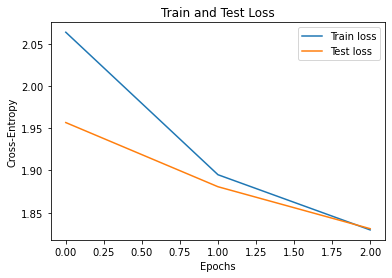

In [10]:
import matplotlib.pyplot as plt

# Plot history: Loss and accuracy
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
#plt.plot(history.history['val_acc'], label='Test accuracy')
plt.title('Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()